In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qclab.models.ab_initio_h2 import AbInitioH2Model
from qclab.drivers.serial_driver import dynamics_serial
from qclab.recipes import AbInitioMeanFieldDynamicsRecipe


input_params = dict(temp = 1, num_atoms=2, init_disp=3, basis='6-31g', num_states=1)
model = AbInitioH2Model(input_params)

model.wf_adb = np.zeros(model.num_states)+0.0j
model.wf_adb[0] = 1.0+0.0j

recipe = AbInitioMeanFieldDynamicsRecipe()



recipe.params.num_trajs = 1
recipe.params.batch_size = 1
recipe.params.tmax = 3
recipe.params.dt_output = 0.01
recipe.params.dt = 0.01

data = dynamics_serial(recipe = recipe, model = model, ncpus = 1, data = None)

  0%|          | 0/1 [00:00<?, ?it/s]

0.0 1.0
0.0
0.0033222591362126247 1.0000000001341003
0.0
0.006644518272425249 1.0000000002694955
0.0
0.009966777408637873 1.0000000004062461
0.0
0.013289036544850499 1.000000000544413
0.0
0.016611295681063124 1.0000000006840581
0.0
0.019933554817275746 1.000000000825242
0.0
0.023255813953488372 1.0000000009680265
0.0
0.026578073089700997 1.0000000011124706
0.0
0.029900332225913623 1.0000000012586314
0.0
0.03322259136212625 1.000000001406565
0.0
0.036544850498338874 1.000000001556323
0.0
0.03986710963455149 1.0000000017079516
0.0
0.04318936877076412 1.0000000018614932
0.0
0.046511627906976744 1.0000000020169817
0.0
0.04983388704318937 1.0000000021744442
0.0
0.053156146179401995 1.000000002333898
0.0
0.05647840531561462 1.0000000024953515
0.0
0.059800664451827246 1.0000000026587998
0.0
0.06312292358803986 1.0000000028242284
0.0
0.0664451827242525 1.000000002991611
0.0
0.06976744186046512 1.000000003160908
0.0
0.07308970099667775 1.0000000033320702
0.0
0.07641196013289037 1.00000000350503

100%|██████████| 1/1 [02:00<00:00, 120.79s/it]


In [4]:
from pyscf import gto, scf
import pyscf

# Define the molecule
mol = gto.M(
    atom="H 0 0 0; H 0 0 1.2",
    basis="ccpvdz",
)

# Create a mean-field object
mf = scf.RHF(mol).run()


pyscf.ao2mo.full(mf.mol, mf.mo_coeff)

converged SCF energy = -1.06111199785749


array([[ 5.31580951e-01, -6.15826834e-17,  4.08281277e-01, ...,
         2.14662023e-18,  6.76499178e-17,  5.45158062e-01],
       [-5.59448321e-17,  1.02321768e-01, -2.75387352e-17, ...,
        -1.16573991e-18, -1.06627912e-17,  2.16840434e-18],
       [ 4.08281277e-01,  3.20923843e-17,  3.68833258e-01, ...,
        -7.48934203e-19,  5.50109909e-17,  4.37143627e-01],
       ...,
       [ 2.14662023e-18, -1.16573991e-18, -7.48934203e-19, ...,
         3.04631956e-02,  0.00000000e+00,  1.47730782e-19],
       [ 6.76499178e-17, -1.06627912e-17,  5.50109909e-17, ...,
        -8.67361738e-19,  3.04631956e-02,  7.62977036e-17],
       [ 5.45158062e-01,  5.33427469e-17,  4.37143627e-01, ...,
         1.47730782e-19,  7.62977036e-17,  6.07030990e-01]])

/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/akrotz/Research/pyMQC/.venv/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


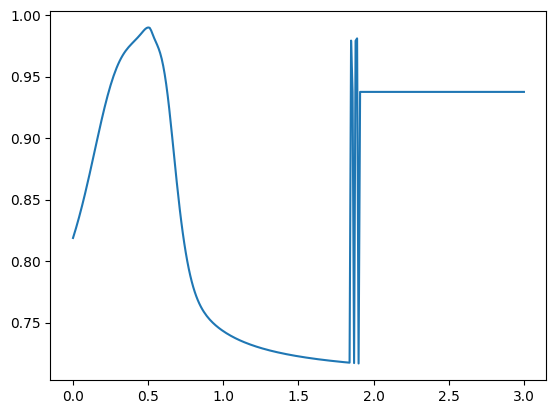

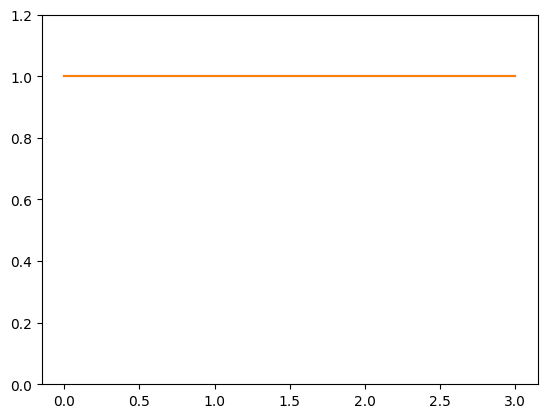

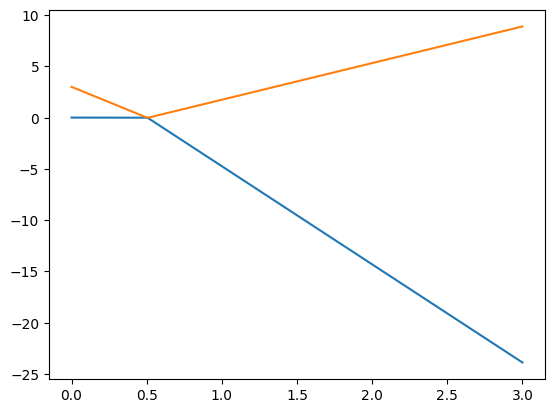

In [2]:

q_data = data.data_dic['q_coord']
wf_adb = data.data_dic['wf_adb']
t = data.data_dic['t']
diag_eq = data.data_dic['diag_eq']
plt.plot(t, diag_eq)
plt.show()
plt.plot(t,np.abs(np.sum(wf_adb,axis=(1,2)))**2)
plt.plot(t,np.sum(np.abs(wf_adb)**2,axis=(1,2,3)))
plt.ylim([0,1.2])
plt.show()
q_data=q_data.reshape((len(q_data), model.num_atoms, 3))
plt.plot(t,np.real(q_data[:,:,-1]))
#plt.ylim([-0.1,0.6])
plt.show()

In [ ]:
import pyscf
print(pyscf.gto.getints(intor_name))

NameError: name 'intor_name' is not defined

In [ ]:
import pyscf 
from pyscf import gto, scf, ci, grad, nac
import numpy as np
from functools import reduce
# Define the molecule
mol = gto.M(
    atom="""
    H 0.0 0.0 0.0
    H 0.0 0.0 0.74 
    """,
    basis='6-31g',
)

# Perform a Hartree-Fock calculation
mf = scf.RHF(mol).run()



# Calculate the CI wavefunction for the first two excited states
myci = ci.CISD(mf)
print(myci)
myci.complex_coeff = True
print(myci.complex_coeff)
myci.nroots = 13
myci.run()
print(myci)
ci_coeffs = myci.ci
print(ci_coeffs)

print('grads',myci.Gradients().grad_elec(civec=ci_coeffs[0]))



eris = myci.ao2mo()
#print(eris)

#print(np.dot(ci_coeffs, myci.contract(ci_coeffs, eris)))

#h_1 = mf.get_hcore()
#print(h_1)
#yci.contract(ci_coeffs, eris=eris)


#print(grad.cisd.grad_elec(myci))

#dc = grad.ucisd.Gradients(myci)
#grad1 = dc.kernel(civec=ci_coeffs+0.0j)

#
# RCISD wavefunction overlap
#
myhf1 = gto.M(atom='H 0 0 0; F 0 0 1.1', basis='6-31g', verbose=0).apply(scf.RHF).run()
ci1 = ci.CISD(myhf1)
ci1.nroots=2
ci1.run()
print('CISD energy of mol1', ci1.e_tot)

myhf2 = gto.M(atom='H 0 0 0; F 0 0 1.2', basis='6-31g', verbose=0).apply(scf.RHF).run()
ci2 = ci.CISD(myhf2).run()
print('CISD energy of mol2', ci2.e_tot)

s12 = gto.intor_cross('cint1e_ovlp_sph', myhf1.mol, myhf2.mol)
s12 = reduce(np.dot, (myhf1.mo_coeff.T, s12, myhf2.mo_coeff))
nmo = myhf2.mo_energy.size
nocc = myhf2.mol.nelectron // 2
print('<CISD-mol1|CISD-mol2> = ', ci.cisd.overlap(ci1.ci[0], ci2.ci, nmo, nocc, s12))

converged SCF energy = -1.12675531719693
True

WARN: Not enough eigenvectors (len(x0)=10, nroots=13)

RCISD root 0  E = -1.151672544961239
RCISD root 1  E = -0.5890774809143035
RCISD root 2  E = -0.1043664754503664
RCISD root 3  E = -0.04062368892334822
RCISD root 4  E = 0.2664408399568212
RCISD root 5  E = 0.6080613584099772
RCISD root 6  E = 0.8182612391101327
RCISD root 7  E = 0.9544509407888406
RCISD root 8  E = 1.4676406950214
RCISD root 9  E = 1.927698295882424
[array([ 9.92767006e-01, -7.67500665e-17,  5.67470373e-03, -1.36311884e-16,
       -7.64960862e-02, -1.56241898e-17,  4.53286032e-02,  1.63612287e-17,
       -5.05447656e-02,  2.60360975e-18,  4.53286032e-02,  3.18765342e-17,
       -4.28191387e-02]), array([ 6.25281653e-17,  6.99681203e-01,  3.72907663e-16,  2.02188638e-02,
        2.09629178e-16,  9.66961607e-02, -4.10674449e-16,  9.66961607e-02,
        1.31423428e-16,  2.62157168e-02, -4.10674449e-16,  2.62157168e-02,
       -4.54006357e-16]), array([-3.87535329e-03, -

[[-2.49164254e-02  3.41782256e-17 -4.02445974e-03  4.30246906e-04
  -8.53735009e-17  1.12980696e-16 -7.32808710e-04 -9.44635628e-04
  -6.13375778e-17  9.68409242e-04]
 [ 1.38580895e-19  2.74235812e-01  1.06071885e-17  2.24432687e-17
  -6.64735932e-02 -7.88536777e-02  4.10738232e-17  6.34517586e-16
  -6.22327107e-02  7.44789550e-16]
 [ 9.80824281e-05 -4.90794245e-17  5.30448217e-01  5.25923839e-02
   1.32981062e-16 -3.57366942e-16 -8.95768371e-02 -1.15470068e-01
   7.40685443e-16  1.18376100e-01]
 [-9.87040602e-06 -5.24022584e-17  4.95058472e-02  1.08083906e+00
   1.65492627e-16 -1.02959726e-16  9.01445620e-03  1.16201901e-02
   1.95080301e-16 -1.19126350e-02]
 [ 2.56463958e-19 -2.56542322e-02  1.96294126e-16  3.23506191e-16
   1.09905692e+00  4.11496895e-01 -4.14665687e-16 -1.31798558e-15
  -1.28385763e-01 -1.08486386e-16]
 [-2.25367595e-18 -2.44393978e-02 -1.84164546e-17  1.06017604e-16
   3.30464827e-01  1.23697497e+00  1.18237699e-15  1.31093014e-15
   1.37374031e-01  8.83876575e-17

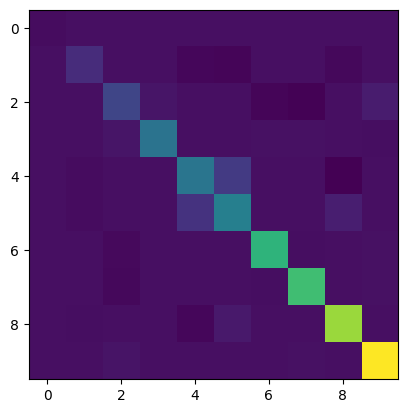

1.0945456740189359


In [ ]:
import matplotlib.pyplot as plt

def generate_CISD_H(myci, civec):
    out_mat = np.zeros((len(civec), len(civec)))
    for n in range(len(civec)):
        #out_mat[:,n] = myci.contract(civec[n], eris=eris)
        for m in range(len(civec)):
            mel = np.dot(civec[m],myci.contract(civec[n], eris=eris))
            out_mat[m, n] = mel

    return out_mat 

H = generate_CISD_H(myci, ci_coeffs)

print(H)
plt.imshow(np.real(H))
plt.show()
print(np.sum(np.abs(H - np.conjugate(np.transpose(H)))))

In [ ]:
print(np.shape(ci_coeffs))
print(np.shape(mf._eri))

(3, 13)
(55,)


In [ ]:
print(np.sort(np.linalg.eigvals(H)))

[-2.49172278e-02+0.00000000e+00j -3.26819728e-17-3.67381386e-17j
 -3.26819728e-17+3.67381386e-17j  6.73498801e-17+1.84889275e-32j
  5.37677836e-01+0.00000000e+00j  1.02238884e+00+0.00000000e+00j
  1.08613163e+00+0.00000000e+00j  1.39319616e+00+0.00000000e+00j
  1.73481668e+00+0.00000000e+00j  1.94501656e+00+0.00000000e+00j
  2.08120626e+00+0.00000000e+00j  2.59439601e+00+0.00000000e+00j
  3.05445361e+00+0.00000000e+00j]
